In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [9]:
data = pd.read_excel('国药FLC冷库出库分析2019.9.18.xlsx', sheet_name='FLC')

In [10]:
# data.iloc[:, :5]
flc_EQ = pd.read_excel('国药FLC冷库出库分析2019.9.18.xlsx', sheet_name='FLC冷库EQ').iloc[:, :8]

In [6]:
idx = flc_EQ[flc_EQ['订单累计占比'] >= 0.2 ].index.tolist()[0]
# result = arr[arr['numTest']>2].index.tolist()
max_row_line = np.max(flc_EQ['订单行数'])
# max_row_line - max_row_line % 10
# type(flc_EQ['订单行数'])

In [7]:
mask = data['货品编号'] == 114800199
type(np.unique(data.loc[:, '日期'])[0])

numpy.datetime64

In [38]:
def refactor_datetime_format(x):
    if isinstance(x, pd.Timestamp):
        return True
    else:
        raise Exception(r"The date-time should be writen as the format of" \
                    " year/month/day hour:minute in row {}. Please use the date format in Excel!".format(x))

datetimes = list(filter(lambda x: refactor_datetime_format(x), data.loc[:, '日期'])) # 清单中所有日期时间戳， 包含重复

In [46]:
type(np.unique(list(data.loc[:, '日期']))[0])
# type(np.unique(datetimes)[0])

pandas._libs.tslibs.timestamps.Timestamp

In [1]:
touches = pd.read_excel('./results/EIQ 2021-05-17-11-13.xlsx')
touches['2019/03/12']

NameError: name 'pd' is not defined

In [53]:
np.sum(touches.iloc[1, 1:])

6

In [ ]:
# statistic of one day, e.g. 3, 12
# EIQ statistics
# 先确定某一天， 即提取出当天所有信息， where；提取出当天所有货品清单， unique, 进行比对 
unique_datetime_items = np.unique(datetimes) # the specific number array of the date
# unique_datetime_items： 储存了所有日期时间戳
filter_data = {} # key (pd.Timestap), value (list), the index in the original data
# filter_data 用来储存当天所有的行号信息
for i, date in enumerate(unique_datetime_items):
    filter_data[date] = []
    for idx, datetime in enumerate(datetimes):
        if datetime.month == date.month and datetime.day == date.day:
            filter_data[date].append(idx)
        # Since the original data is a sorted sequence, we can do the following break code. 
        if datetime.day > date.day:
            break

In [12]:
goods_bill = np.unique(data.loc[:, '货品编号'])
orders_bill = np.unique(data.loc[:, '出货单号'])

In [5]:
mask = filter_data[unique_datetime_items[0]]  # the list of the data we are going to use in 3/12

In [6]:
data_3_12 = data.iloc[mask, :]

In [7]:
goods_bill_3_12 = np.unique(data_3_12.loc[:, '货品编号']) 

In [28]:
# 现在可以做， 统计某一类货品的所有数量
goods_order = {}  # 存储当天订单中出现商品所出货数量

for goods_name in goods_bill_3_12:
    goods_order[goods_name] = 0
    for idx, goods_num in enumerate(data_3_12.loc[:, '货品编号']):
        if goods_num == goods_name:
            goods_order[goods_name] +=data_3_12.loc[idx, '数量']

In [46]:
# ax2.get_yticks()

array([-200.,    0.,  200.,  400.,  600.,  800., 1000.])

In [38]:
sorted_order_list = sorted(goods_order.items(), key=lambda d:d[1], reverse=True) #[(114800269, 80),...]
cum_order_list = np.cumsum([i[1] for i in sorted_order_list])
cum_order_list = np.append(0, cum_order_list)

In [59]:
from matplotlib import rcParams

config = {
    "font.family": 'FangSong',
    "font.size": 20,
    "mathtext.fontset": 'stix',
    "axes.titlesize": 24, 
    'axes.unicode_minus': False # # 解决保存图像是负号'-'显示为方块的问题
}
rcParams.update(config)

In [120]:
def helper_function_axlim(sorted_order_list):
    ax1_lim_max = np.max(sorted_order_list)
    if not (ax1_lim_max % 10 == 0):
        ax1_lim_max = (10 - ax1_lim_max % 10) + ax1_lim_max
    return ax1_lim_max + 10

helper_function_axlim([i[1] for i in sorted_order_list])

90

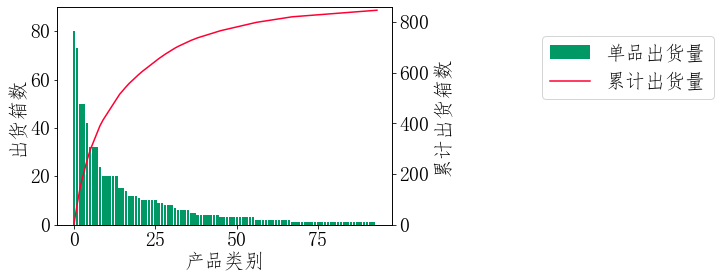

In [121]:

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()           # 做镜像处理
legend1 = ax1.bar([i for i in range(len(sorted_order_list))], [i[1] for i in sorted_order_list],color='#009966', label='单品出货量')
legend2 = ax2.plot([i for i in range(len(cum_order_list))], cum_order_list, c='#FF0033', label='累计出货量')
 
ax1.set_xlabel('产品类别')    #设置x轴标题
ax1.set_ylabel('出货箱数',color = 'k')   #设置Y1轴标题
ax2.set_ylabel('累计出货箱数',color = 'k')   #设置Y2轴标题
ax1.set_ylim([0, helper_function_axlim([i[1] for i in sorted_order_list]) ])
ax2.set_ylim([0, helper_function_axlim(cum_order_list)])

fig.legend(loc=1, bbox_to_anchor=(2,1), bbox_transform=ax1.transAxes)
plt.savefig('./plato.svg', dpi=1600, bbox_inches='tight')

plt.show()
# ax2.set_yticks(np.linspace(0, ax2.get_yticks()[-1], 5))
# plt.bar([i for i in range(len(sorted_order_list))], [i[1] for i in sorted_order_list])

# plt.plot([i for i in range(len(cum_order_list))], cum_order_list, c='r')

In [9]:
np.unique(data.loc[:, '包装'])

array([ 1,  4, 10], dtype=int64)

In [97]:

data.query('包装=="4"')

,日期时间,日期,时间,时间段,波次时段,拣货单号,出货单号,货主编号,货品编号,货品名称,...,规格,包装,单位,数量,库区类型,库区,货位,出库中包装数,箱规,波次拣箱
27,2019-03-12 09:14:18.343,2019-03-12,09:14:18,9,435360.09,JH2019030533,CHD2019030560,100148,114800269,全自动免疫检验系统用底物液,...,130ml/瓶*4瓶,4,瓶,40,散件库,冷藏拣选F区,FLC0401101,10,30,0.333333
41,2019-03-12 09:51:19.080,2019-03-12,09:51:19,9,435360.09,JH2019030543,CHD2019030570,100148,114800269,全自动免疫检验系统用底物液,...,130ml/瓶*4瓶,4,瓶,28,散件库,冷藏拣选F区,FLC0401101,7,30,0.233333
86,2019-03-12 14:53:40.560,2019-03-12,14:53:41,14,435360.14,JH2019030574,CHD2019030601,100148,114800269,全自动免疫检验系统用底物液,...,130ml/瓶*4瓶,4,瓶,12,散件库,冷藏拣选F区,FLC0405503,3,30,0.100000
139,2019-03-13 11:54:15.297,2019-03-13,11:54:15,11,435370.11,JH2019030634,CHD2019030666,100148,114800269,全自动免疫检验系统用底物液,...,130ml/瓶*4瓶,4,瓶,4,散件库,冷藏拣选F区,FLC0403301,1,30,0.033333
144,2019-03-13 11:58:50.883,2019-03-13,11:58:51,11,435370.11,JH2019030636,CHD2019030665,100148,114800269,全自动免疫检验系统用底物液,...,130ml/瓶*4瓶,4,瓶,8,散件库,冷藏拣选F区,FLC0403301,2,30,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13542,2019-07-31 12:20:39.850,2019-07-31,12:20:40,12,436770.12,JH2019071698,CHD2019071777,100148,114800269,全自动免疫检验系统用底物液,...,130ml/瓶*4瓶,4,瓶,12,散件库,冷藏拣选F区,FLC0103305,3,30,0.100000
13547,2019-07-31 12:21:35.550,2019-07-31,12:21:36,12,436770.12,JH2019071699,CHD2019071778,100148,114800269,全自动免疫检验系统用底物液,...,130ml/瓶*4瓶,4,瓶,8,散件库,冷藏拣选F区,FLC0103305,2,30,0.066667
13567,2019-07-31 12:24:07.987,2019-07-31,12:24:08,12,436770.12,JH2019071702,CHD2019071773,100148,114800269,全自动免疫检验系统用底物液,...,130ml/瓶*4瓶,4,瓶,4,散件库,冷藏拣选F区,FLC0103305,1,30,0.033333
13767,2019-08-01 14:20:57.960,2019-08-01,14:20:58,14,436780.14,JH2019080057,CHD2019080059,100148,114800269,全自动免疫检验系统用底物液,...,130ml/瓶*4瓶,4,瓶,16,散件库,冷藏拣选F区,FLC0103305,4,30,0.133333


In [17]:
value_list = [1, 7, 4, 9, 5, 6, 0]
position_list = [i for i in range(1, len(value_list)+1)]
# zipped = zip(position_list, value_list)
sorted_value = sorted(value_list, reverse=True)
# sorted_value
# zipped = zip(position_list, sorted_value)

position_info = []
for num in value_list:
    for pos_mark, num_mark in zip(position_list, sorted_value):
        if int(num) == int(num_mark):
            # print(pos_mark, num_mark)
            position_info.append(pos_mark)
            break

In [18]:
position_info

[6, 2, 5, 1, 4, 3, 7]

In [ ]:
sorted_value